In [3]:
from rackuten_project_lib import *

In [6]:
# path : directory où se trouve les DF Final cleand containing Labels , classes number changed , image_name
path= 'D:/DataScienTest_WorkSpace/WS/Travail_Final/Datasets/'

# Callback outputs , hdf5 files 
path_output_models = 'D:/DataScienTest_WorkSpace/WS/Travail_Final/Trained_models/SimpleDNN/'

In [13]:
xtrain = pd.read_pickle(path + 'df_train_final.pkl')
xtrain

,designation,description,productid,imageid,text,prdtypecode,labels,image_name
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,<NA>,3804725264,1263597046,olivia personalisiertes notizbuch seiten punkt...,0,adult books,image_1263597046_product_3804725264.jpg
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,<NA>,436067568,1008141237,journal arts art marche salon art asiatique pa...,18,magazines,image_1008141237_product_436067568.jpg
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,2,video games accessories,image_938777978_product_201115110.jpg
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,<NA>,50418756,457047496,peluche donald europe disneyland marionnette d...,7,toys for children,image_457047496_product_50418756.jpg
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,guerre tuques luc grandeur veut organiser jeu ...,25,books,image_1077757786_product_278535884.jpg
...,...,...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],<NA>,206719094,941495734,sims import anglais,1,imported video games,image_941495734_product_206719094.jpg
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,kit piscine acier nevada deco pierre descripti...,23,piscine spa,image_1188462883_product_3065095706.jpg
84913,Journal Officiel De La Republique Francaise N°...,<NA>,440707564,1009325617,journal officiel republique francaise changeme...,18,magazines,image_1009325617_product_440707564.jpg
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,table basse bois recuperation massif base blan...,13,interior furniture and bedding,image_1267353403_product_3942400296.jpg


In [14]:
ytrain = pd.DataFrame(xtrain['prdtypecode']).astype('int64')


In [15]:
unique, counts = np.unique(ytrain, return_counts=True)
dict(zip(unique, counts))

{0: 3116,
 1: 2508,
 2: 1681,
 3: 832,
 4: 2671,
 5: 3953,
 6: 764,
 7: 4870,
 8: 2070,
 9: 5045,
 10: 807,
 11: 2491,
 12: 3241,
 13: 5073,
 14: 4303,
 15: 803,
 16: 4993,
 17: 824,
 18: 4760,
 19: 4774,
 20: 1421,
 21: 4989,
 22: 2589,
 23: 10209,
 24: 2496,
 25: 2761,
 26: 872}

In [16]:
y = ytrain
#y

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
text_train, text_test, y_train, y_test = train_test_split(xtrain['text'], y, test_size=0.2, random_state=1234)  

In [19]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)#default was 10000/best 20000

tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)

X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

#print(text_train.shape)
#print(len(X_train))

In [20]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 400 #defautl was 250, best 400

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#print("X_train", len(X_train))
#print("X_test", len(X_test))

In [21]:
embedding_dim = 100

In [22]:
from tensorflow.keras.layers import LSTMCell
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, RNN, GRUCell, Dropout, concatenate, SpatialDropout1D, Conv1D

In [23]:
# For saving Callbacks and history results
path = 'D:/DataScienTest_WorkSpace/WS/Rackupy_WS/Travail_Final/Trained_models/'
date_result = '13022022'
nbr_Epochs = 100
batch_size = 200

#                                SIMPLE DNN 

In [58]:
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.Flatten())
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dropout(0.5)) 
model1.add(layers.Dense(27, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


learning_rate =  0.001

model1.compile(optimizer= Adam(learning_rate= learning_rate), #  0.001 , default LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 100)          12494000  
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               4000100   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 27)                2727      
                                                                 
Total params: 16,496,827
Trainable params: 16,496,827
Non-trainable params: 0
_________________________________________________________________


***Callback***

In [30]:
dir_out1 = 'Simple_DNN_by_Tooba/'

In [71]:
%%time

file_name_checkpnt1 = 'checkpoint_SimpleDNN_' + date_result +  \
                                       '_LR_'+str(learning_rate) + '_' + str(nbr_Epochs)+ 'Epochs.h5'

#Sauvegarder les meilleurs poids du modèle au cours de l'entraînement :
checkpoint1 = ModelCheckpoint(filepath = path_output_models + dir_out1 + file_name_checkpnt1 , 
                             monitor ='val_accuracy',
                             verbose = 1,
                             save_best_only = True, # (pour que le meilleur modèle ne soit pas écrasé)
                             save_weights_only = False,
                             mode ='max', #(permet de préciser si la métrique doit croître ou décroitre : ici on choisit 'min'
                                           #car la métrique est une perte à minimiser)
                             save_freq='epoch')
#Arrêter l'entraînement si le modèle n'évolue plus (très pratique pour ne pas gérer le
#nombre d'epoch) :
# A modifier pour avoir des 
early1 = EarlyStopping(monitor='val_loss',                    
                      min_delta = 0,
                      patience =10, #(nombre d'epochs à attendre avant d'arrêter l'entraînement
                      restore_best_weights = True,
                      verbose = 1,
                      mode = 'min')

#lr_reduce = ReduceLROnPlateau(patience=2,
  #                             verbose=1)

callbacks1 = [checkpoint1, early1]

Wall time: 0 ns


In [72]:
path_output_models + dir_out1 + file_name_checkpnt1

'D:/DataScienTest_WorkSpace/WS/Travail_Final/Trained_models/SimpleDNN/Simple_DNN_by_Tooba/checkpoint_SimpleDNN_13022022_LR_0.001_100Epochs.h5'

In [61]:
history_model1 = model1.fit(X_train, y_train.values,
                            batch_size = 200,
                            epochs = nbr_Epochs,
                            validation_data = [X_test, y_test.values],
                            callbacks = callbacks1
                           )

Epoch 1/100
338/340 [============================>.] - ETA: 0s - loss: 2.0397 - accuracy: 0.4166
Epoch 00001: val_accuracy improved from -inf to 0.74152, saving model to D:/DataScienTest_WorkSpace/WS/Travail_Final/Trained_models/SimpleDNN/Simple_DNN_by_Tooba\checkpoint_SimpleDNN_13022022_LR_Defaut_0.001_100_Epochs.h5
340/340 [==============================] - 4s 10ms/step - loss: 2.0352 - accuracy: 0.4179 - val_loss: 0.9344 - val_accuracy: 0.7415
Epoch 2/100
335/340 [============================>.] - ETA: 0s - loss: 0.7721 - accuracy: 0.7799
Epoch 00002: val_accuracy improved from 0.74152 to 0.80252, saving model to D:/DataScienTest_WorkSpace/WS/Travail_Final/Trained_models/SimpleDNN/Simple_DNN_by_Tooba\checkpoint_SimpleDNN_13022022_LR_Defaut_0.001_100_Epochs.h5
340/340 [==============================] - 3s 10ms/step - loss: 0.7711 - accuracy: 0.7802 - val_loss: 0.6762 - val_accuracy: 0.8025
Epoch 3/100
338/340 [============================>.] - ETA: 0s - loss: 0.4843 - accuracy: 0.862

In [62]:
valid_score_model1 = model1.evaluate(X_test, y_test.values, batch_size=batch_size)

85/85 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.8114


In [33]:
y_pred_model1 = model1.predict(X_test)
#Appliquer la méthode argmax du tableau y_pred pour obtenir les classes les plus probable

y_pred_class_model1 = y_pred_model1.argmax(axis = 1)

In [34]:
%%time
#Get the accuracy score
valid_score_model1 = model1.evaluate(X_test, y_test, batch_size=batch_size)

print("Accuracy: {:.2f}%".format(valid_score_model1[1] * 100)) 
print("Loss: ",valid_score_model1[0])
simpDNN_SC_model1 = np.round((valid_score_model1[1] * 100), 2)

85/85 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.8114
Accuracy: 81.14%
Loss:  0.6543752551078796
Wall time: 365 ms


In [35]:
print(metrics.classification_report( y_test.values, y_pred_class_model1))

              precision    recall  f1-score   support

           0       0.40      0.62      0.49       643
           1       0.75      0.62      0.68       503
           2       0.77      0.86      0.81       319
           3       0.97      0.82      0.89       179
           4       0.77      0.80      0.79       545
           5       0.87      0.90      0.88       793
           6       0.75      0.47      0.58       144
           7       0.72      0.73      0.73      1002
           8       0.68      0.54      0.60       408
           9       0.94      0.94      0.94       993
          10       0.97      0.88      0.92       162
          11       0.84      0.77      0.80       514
          12       0.79      0.78      0.79       664
          13       0.80      0.86      0.83       993
          14       0.86      0.95      0.90       832
          15       0.85      0.80      0.82       159
          16       0.83      0.78      0.80       970
          17       0.93    

***Save  results***

In [78]:
file_history1 = 'history_SimpleDNN_' + date_result +  \
                                       '_LR_'+str(learning_rate) + '_SC_' + str(simpDNN_SC_model1) + '%_' \
                                    + str(nbr_Epochs)+ 'Epochs.h5'                                                 

In [79]:
#convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history_model1.history) 

# history to json:  
hist_json_file = path_output_models + dir_out1 +  file_history1 + '.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# history to csv: 
hist_csv_file = path_output_models +  dir_out1 +  file_history1 +'.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# history to pickle file
hist_df.to_pickle(path_output_models + dir_out1 +  file_history1 +'.pkl')

***Display Model loss , accuracy per epoch***

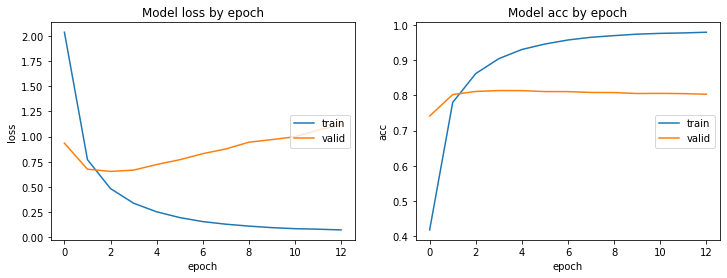

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')

plt.subplot(122)
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')
plt.show()

***Save trained model***

In [81]:
file_mod_name = 'Model_SimpleDNN_' + date_result +  \
                                       '_LR_'+str(learning_rate) + '_SC_' + str(simpDNN_SC_model1) + '%_' \
                                    + str(nbr_Epochs)+ 'Epochs.hdf5'